# Quantum Teleportation

In [7]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit_aer import Aer
import matplotlib as mpl

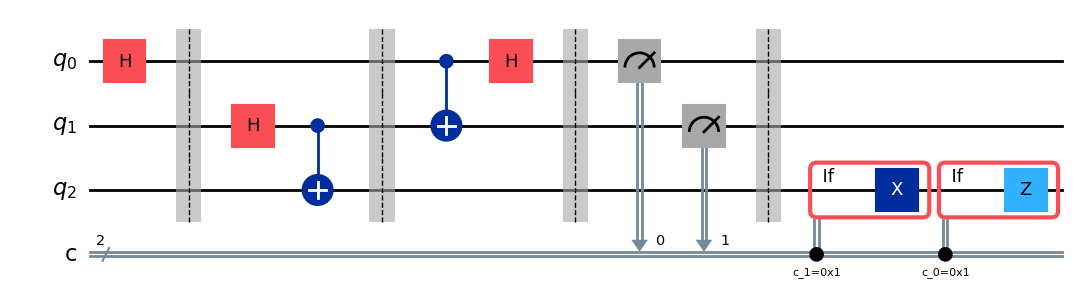

In [13]:
# Create quantum registers
qr = QuantumRegister(3, name='q')
cr = ClassicalRegister(2, name='c')

# Create quantum circuit
qc = QuantumCircuit(qr, cr)

# Alice's message (q0)
qc.h(qr[0])
qc.barrier()

# Bell state between Alice (q1) and Bob (q2)
qc.h(qr[1])
qc.cx(qr[1], qr[2])
qc.barrier()

# Alice does a Bell measurement
qc.cx(qr[0], qr[1])
qc.h(qr[0])
qc.barrier()

# Alice measures her qubits (q0 and q1)
qc.measure(qr[0], cr[0])
qc.measure(qr[1], cr[1])
qc.barrier()

# Bob applies gates to measure the state
with qc.if_test((cr[1], 1)): # If the second qubit is 1, apply Pauli X
    qc.x(qr[2])
    
with qc.if_test((cr[0], 1)): # Further, if the first qubit is also 1, apply Pauli Z
    qc.z(qr[2])

qc.draw('mpl')